In [ ]:
# 필요 라이브러리
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import warnings
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

!pip install yfinance
!pip install pyfolio

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 16.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 91 kB 4.6 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=1fd5445f166364d

# 0. 서론
- **자산 배분** : 투자자의 총 투자액을 특정 자산(주식, 옵션, 채권, ...)에 분산시키는 것
  - 모든 투자자에게 들어맞는 단일 해법 ❌
  - 배분을 고려할 때 **위험**과 **잠재적 보상** 사이의 균형 유지
  - 개별 목표(예상 수익률), 위험 허용치(수용할 위험 정도), 투자 기간(장/단기) 요인에 따라 달라짐
- 자산 배분 🆚 분산 투자
  - 분산 투자 : ex) 삼성전자, 현대자동차, 네이버 이런 식으로 주식을 사는 것(종목 분산) / 미국 주식, 중국 주식, 한국 주식 / 주식을 살 때 매달 얼마씩 나누어서 사는 것(시간분산)
  - 자산 배분 : 투자금을 주식, 채권, 원자재, 금, 은, 외환 등 *상관 관계*가 서로 다른 자산으로 함께 구성하는 것. ex) 예금에 2,000만 원, 주식에 2,000만 원, 부동산에 3,000만 원, 벤처 투자에 1,000만 원 투자
  - 자산배분이 수익률에 더 큰 영향을 준다!
    - 포트폴리오 수익률을 결정하는 것은 어떤 종목을 선택하는지의 문제가 아니라, *자산의 배분을 어떻게 하느냐의 문제* ➡ 개인이 늘 수익률 높은 종목을 선택할 가능성이 매우 낮기 때문
    - 채권과 주식의 관계처럼 서로 성격이 상이한 자산에 고르게 투자함으로써 자산 전체의 위험을 줄이고 수익률을 높이는 것이 결과적으로 돈을 벌 확률🔼
  - 시장 변동성에 강한 자산 배분!
    - 자산배분의 장점은 상황의 변화에 여유롭게 대처할 수 있다는 점 ➡ 자산 배분은 시기마다 오르는 자산이 다르다. ex) 채권 수익률이 좋을 때 주식은 안 좋다. 각각의 자산이 다른 등락 주기를 갖기 때문에 느긋하게 기회를 엿보며 기다릴 수 있다.
    -  수익이 주식보다 낮다는 것은 자산 배분의 단점일 수 있다. ➡ 빨리 수익을 거두는 것이 아닌 노후 준비를 위한 자금을 확보하는 것이 투자의 목적이라면 자산배분과 잘 맞아 떨어진다. 즉, 자산배분은 목돈에 적합. 잃으면 안 되는 돈, 깨지면 안 되는 돈, 지켜야 할 돈을 굴릴 때 자산 배분이 중요
    - [출처](https://50plus.or.kr/detail.do?id=9291618)

### 현대 포트폴리오 이론(MPT)
- 자산 배분의 핵심 프레임워크 (= 평균-분산 분석)
- 특정 위험 수준에 대해 기대 수익률(이익)을 극대화하고자 **위험을 피하며 포트폴리오를 구성하는 방법** 설명
- 주요 통찰 : 자산 성과만 평가 ❌ -> 여러 지표가 자산 포트폴리오의 성과에 미치는 영향을 조사
- **다각화 개념**과 밀접한 관련
  - 투자 다각화 : 리스크를 전략적으로 관리하기 위해 하나의 포트폴리오에 다양한 종류의 투자 상품을 함께 관리하는 것
  - 다양한 종류의 투자 상품을 함께 관리함으로써 단일 리스크에 의한 투자 포트폴리오의 수익률 변동을 줄일 수 있다.
- 포트폴리오 수익률 = 개별 자산 수익률의 가중 평균 -> 위험은 이에 해당 ❌
- 최적화된 자산 배분 ➡ 포트폴리오 내 개별 자산 중 가장 낮은 변동성을 가진 것보다 더 변동성이 낮은 포트폴리오 가질 수 있음
- 자산 간의 상관관계에 따라 다르다 ➡ 보유 자산 간 상관관계 낮을수록 다각화 good! ➡ 완벽한 음의 상관관계를 통해 모든 위험 다각화 가능

###  현대 포트폴리오 이론의 주요 가정
- 투자자는 합리적이고 수익을 극대화하는 동시에 가능한 한 위험을 피하는 것을 목표로
- 투자자들은 기대 수익을 극대화하려는 목표를 공유
- 모든 투자자는 잠재적 투자에 대해 동일한 수준의 정보를 공유
- 커미션, 세금, 거래 비용 고려 ❌
- 투자자는 무위험 금리(무제한) 돈을 빌리거나 빌려 줄 수 있다

# 1. 기본 1/n 포트폴리오의 성능 평가
- **1/n 포트폴리오**
  - 가장 기본적인 자산 배분 전략
  - 고려 중인 모든 자산에 **동일 가중치** 배분해 포트폴리오 다각화
- 진행 : 1/n 포트폴리오 생성, 수익 계산 ➡ **pyfolio** 라이브러리 이용해 **테어 시트** 형태로 관련 포트폴리오 평가 지표 빠르게 구하기
  - 테어 시트 : 간결하고 한 페이지로 된 문서. 기업 공개된 회사의 중요 정보 요약

In [ ]:
# 라이브러리 불러오기
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [ ]:
# 매개 변수 설정
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2017-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

[*********************100%***********************]  4 of 4 completed
Downloaded 501 rows of data.


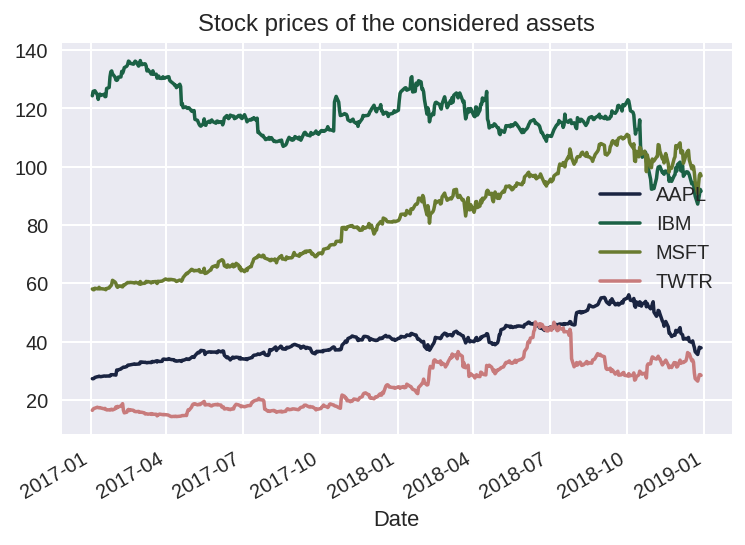

In [ ]:
# 야후 파이낸스에서 주가 다운로드
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [ ]:
# 개별 자산 수익률 계산
returns = prices_df['Adj Close'].pct_change().dropna()

In [ ]:
# 가중치 정의 (1/n = 1/n_assets)
portfolio_weights = n_assets * [1 / n_assets]

In [ ]:
# 포트폴리오 수익률 계산
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                              index=returns.index)

- np.dot 함수 사용 ➡ 포트폴리오 가중치 행렬 & 자산 수익률 전치 행렬 내적 ➡ 포트폴리오 수익률 계산

#### 테어 시트의 중요 지표
- 샤프 비율 : 표준편차 단위 당 초과 수익률. 클수록 포트폴리오 위험 조정 성능 🔼 (내가 투자하는 포트폴리오의 변동성을 감수하는 대신, 얼마나 수익을 얻을 수 있는지 비율로 나타낸 수치), 무위험 금리가 제공되지 않으면 0%
- 최대 드로우다운 : 포트폴리오 하락 위험에 대한 지표. 가장 큰 피크 대비 밸리 손실 측정 (최고점에서 최저점까지 자산의 최대 가격 하락을 측정) 낮을수록 good
- 칼마 비율 : 평균 연복리 수익률을 동일 기간 최대 드로우다운으로 나눈 값. 높을수록 good
- 안정성 : 누적 로그 수익률에 대한 선형 적합의 r제곱. 누적 로그 수익률에 대한 정수 범위 회귀를 적용하는 것을 의미
- 오메가 비율 : 수익 목표 임계값에 대한 손실 대비 이익의 확률 가중 비율. 모든 수익률 분포 모멘트 고려 (샤프는 평균, 비율만)
- 소르티노 비율 : 샤프 비율 수정. 분모의 표준편차를 하방 단측 표준편차로 대체(상승 변동성, 양의 수익이 위험에 영향을 미치지x). 목표주순 대비 하락한 수익률 위험을 고려한 지수
- 왜도 : 정규분포 대비 비대칭 정도. 음의 왜도(왼쪽 꼬리 ⬆) = 큰 음의 수익률이 양의 수익률보다 자주 발생
- 첨도 : 꼬리 중 하나에서 극단적인 값. 첨도가 큰 분포 = 크고 작은 수익률이 더 자주 발생
- 꼬리 비율 : 일 수익률의 95번째 & 5번째 백분위 수 사이의 비율
- 일일 밸류 앳 리스크 : μ-2σ (μ: 평균 포트폴리오 수익률, σ: 표준 편차)



Start date,2017-01-04
End date,2018-12-28
Total months,23
,Backtest
Annual return,17.7%
Cumulative returns,38.3%
Annual volatility,21.8%
Sharpe ratio,0.86
Calmar ratio,0.70
Stability,0.87
Max drawdown,-25.3%


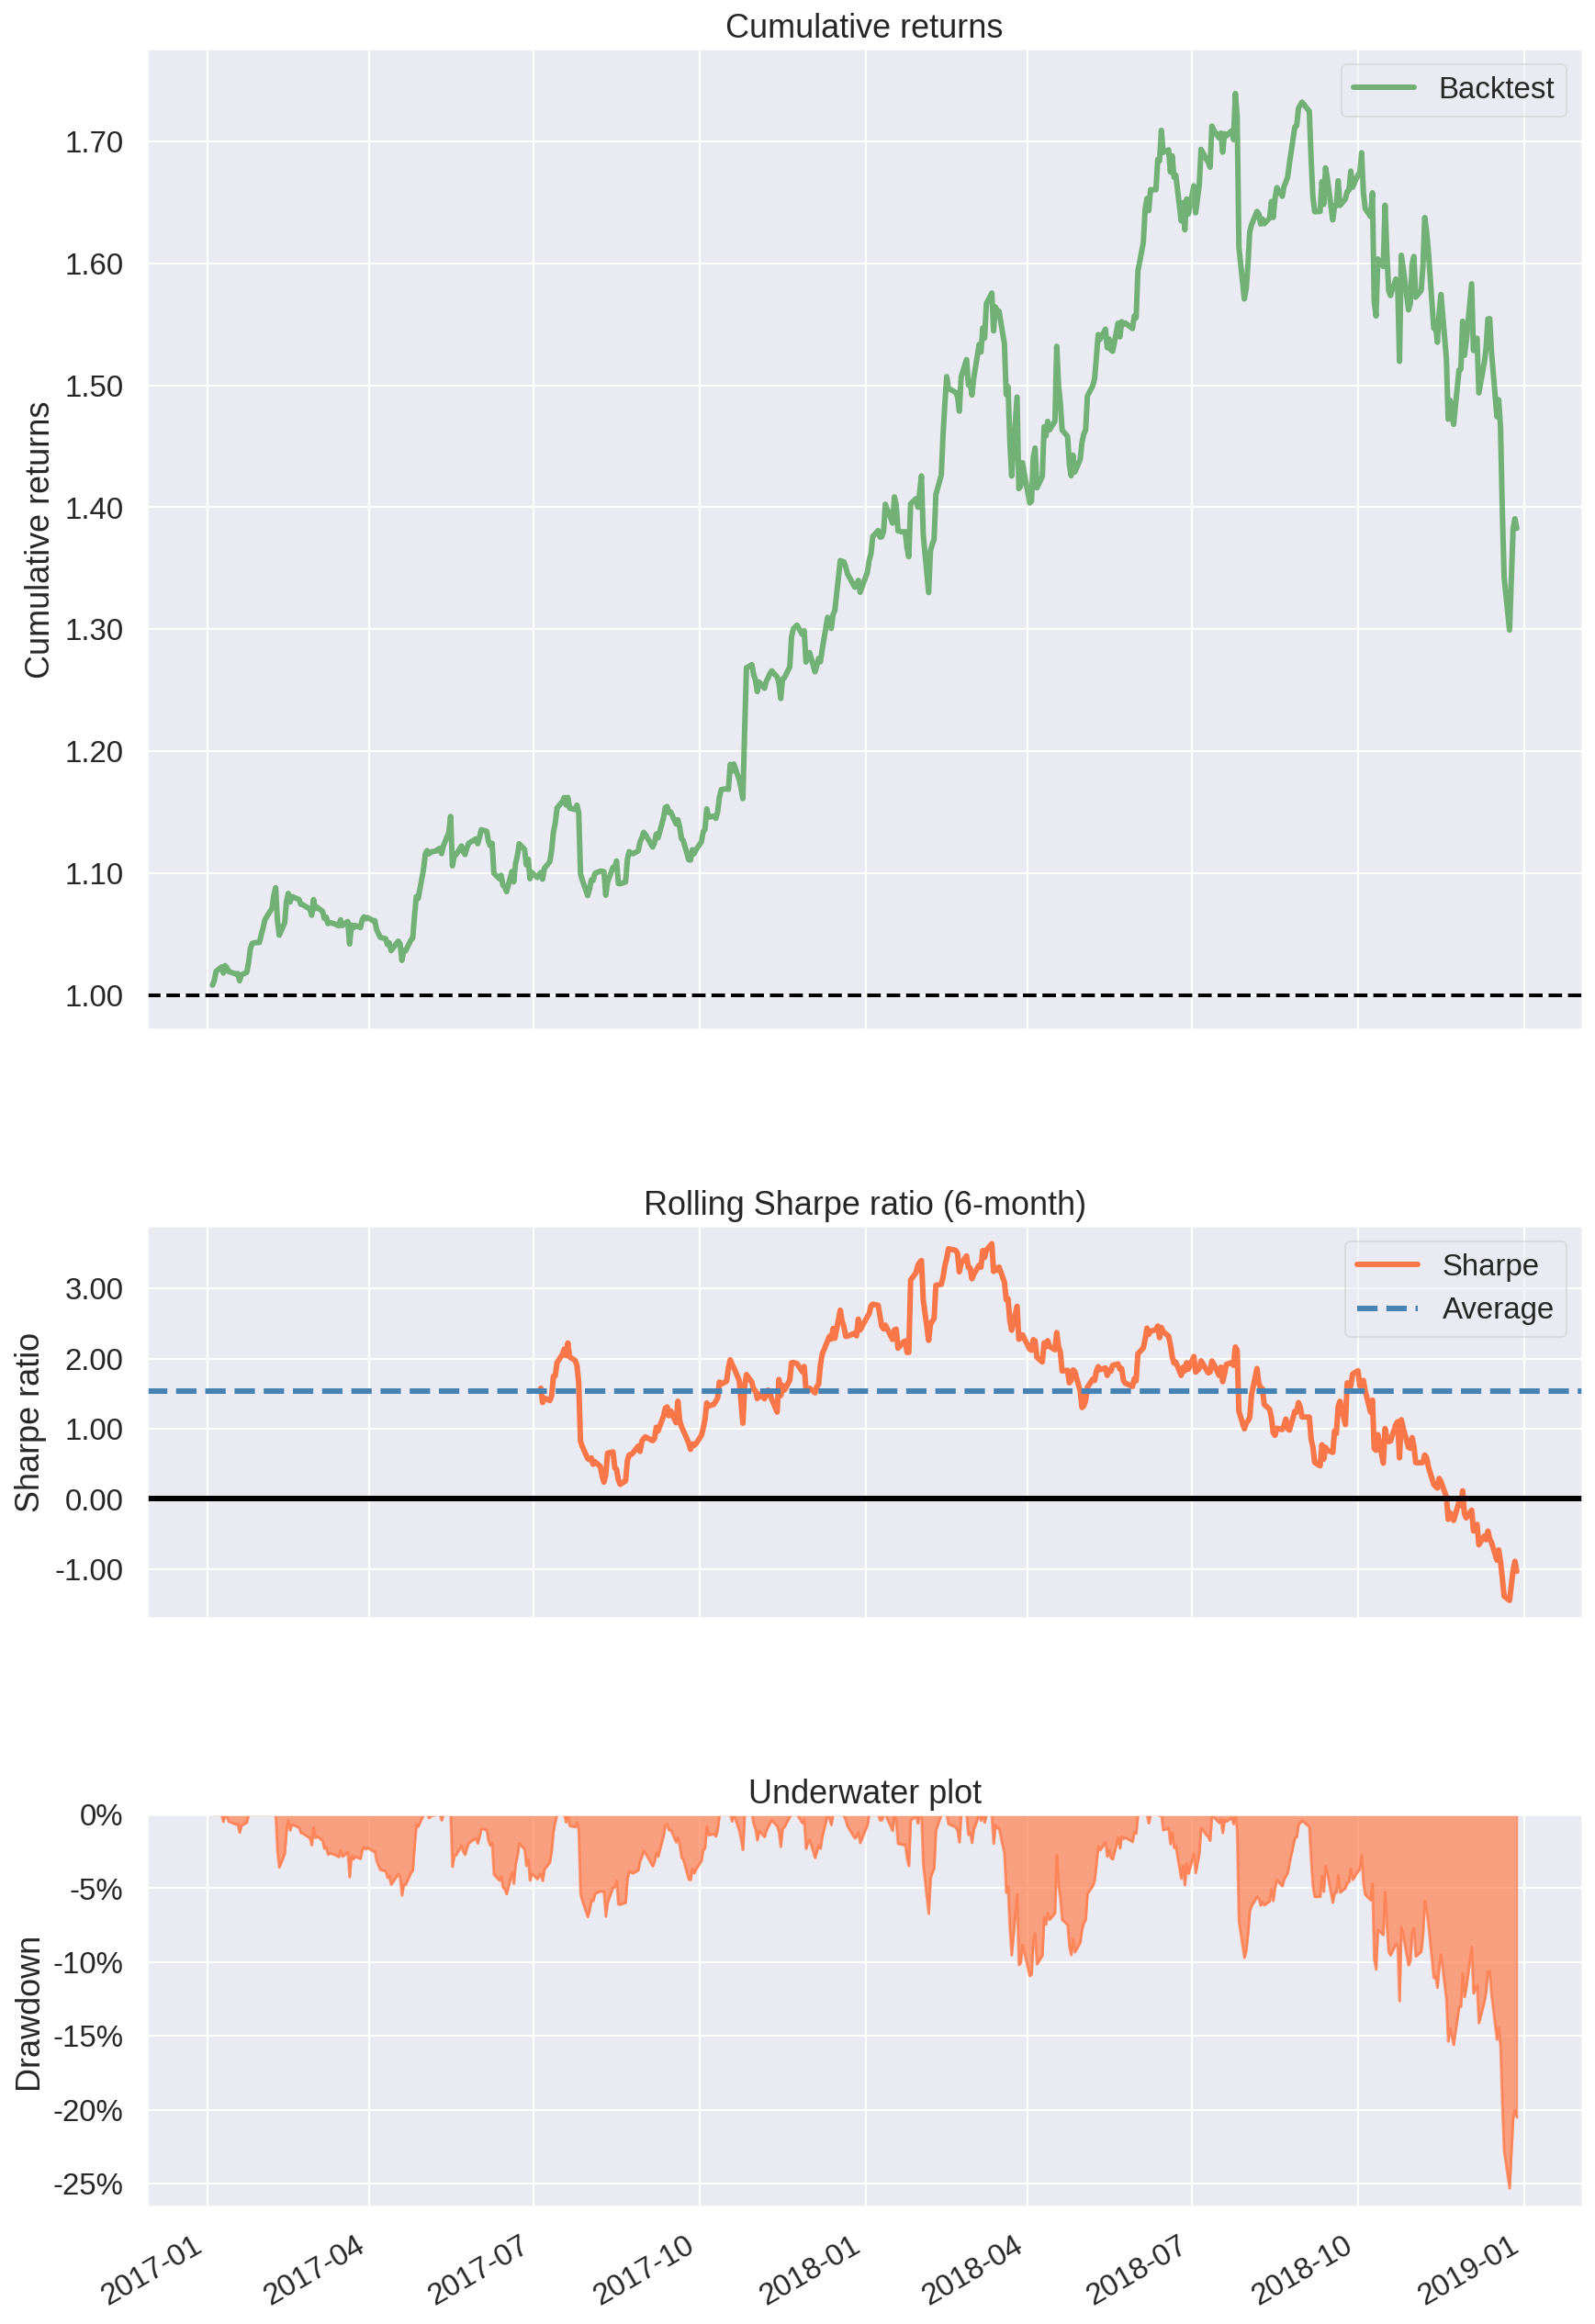

In [ ]:
# 테어 시트 생성(단변량)
pf.create_simple_tear_sheet(portfolio_returns)

#### 테어 시트 그림
- 누적 수익률 그림 : 시간에 따른 포트폴리오의 가치 변화
- 롤링 샤프 비율 : 일정 기간동안 연속적으로 계산되는 샤프 비율 ➡ 전략이 때때로 가치가 떨어지는 경향이 있는지 or 일관적인 경향이 있는지 여부를 알 수 있음
- 수중 그림 : 손실에 중점을 둔 비관적인 관점에서 투자를 표시. 새로운 고점을 회복될 때까지 지속 기간 표시 ➡ 손실 기간이 얼마나 오래 지속됐는지 알 수 있음

### 추가 사항) pf.create_returns_tear_sheet()
- 상위 5개의 드로우다운 기간이 있는 표 & 그림
- 포트폴리오 수익률 분포를 설명하는 그림 추가 가능
  - 특정 달/연도별 수익률 요약
  - 월별 수익률 분포 ,...


# 2. 몬테카를로 시뮬레이션을 사용해 효율적 경계선 찾기
- **효율적 경계선** : 위험-수익률 스펙트럼에서 최적의 포트폴리오 🔗[참고 자료](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gdpresent&logNo=220890967416)
  - 주어진 위험 수준에서의 최대 기대 수익률을 제공
  - 주어진 기대 수익률 수준에서의 최저 위험 수준 제공
  - 효율적 경계 곡선 아래에 있는 포트폴리오 = 차선책 ➡ **경계선의 포트폴리오**를 선택하는 것이 항상 더 좋다❗
- 무차별 대입 몬테카를로 시뮬레이션 사용
  - 몬테 카를로 시뮬레이션 :  무작위 추출된 난수를 이용하여 원하는 함수의 값을 계산하기 위한 시뮬레이션 방법
- 무작위로 배분된 가중치 사용해 수천 개의 포트폴리오 구축 & 결과 시각화


In [ ]:
# 라이브러리 불러오기
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
# 매개 변수 지정
N_PORTFOLIOS = 10 ** 5  #10만개
N_DAYS = 252
RISKY_ASSETS = ['FB', 'TSLA', 'TWTR', 'MSFT']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

- sort() 함수 사용해 알파벳 순서로 정렬 : yf 라이브러리에서 목록 순서와 다운로드 순서가 다를 때 문제 발생

[*********************100%***********************]  4 of 4 completed
Downloaded 250 rows of data.


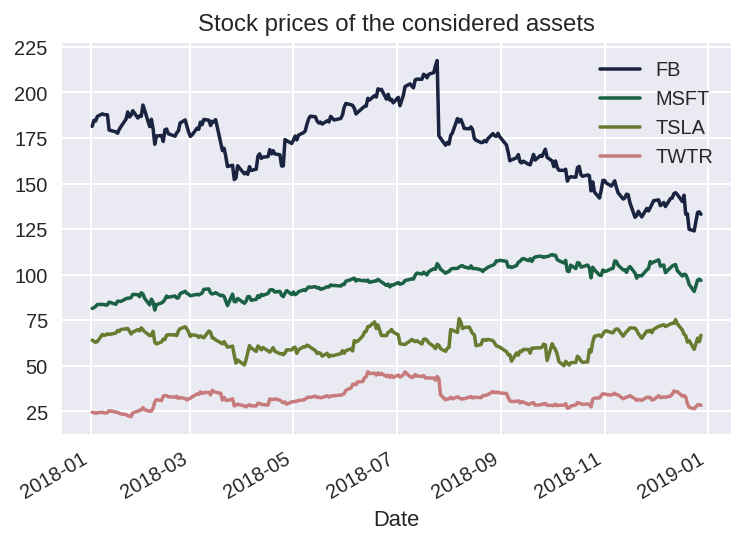

In [ ]:
# 야후 파이낸스에서 주가 다운로드
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df['Adj Close'].plot(title='Stock prices of the considered assets');

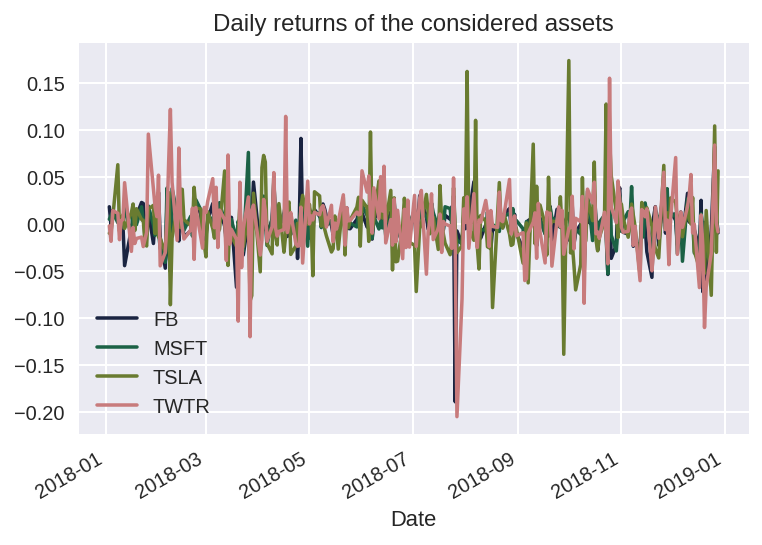

In [ ]:
# 연납화 평균 수익률과 표준 편차 계산
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

returns_df.plot(title='Daily returns of the considered assets');

- 평균 연간 수익률, 공분산 행렬에 252(연간 평균 거래일 수)를 곱해 연환산!

In [ ]:
# 랜덤 포트폴리오 가중치를 시뮬레이션
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

- 앞선 가정) 가중치는 양수 & 총합은 1

In [ ]:
# 포트폴리오 지표 계산
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

- 예상 연간 포트폴리오 수익률 : **가중치 * 연간 평균**
- 표준 편차 : **w<sup>T</sup>∑w**  (w = 가중치 벡터, ∑ = 과거 공분산 행렬)

In [ ]:
# 모든 데이터를 가진 DataFrame 생성
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

In [ ]:
# 효율적 경계선을 생성하는 점을 알아 낸다.
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

- 각각의 예상 수익에 대해 관측 가능한 **최소 변동성** 발견

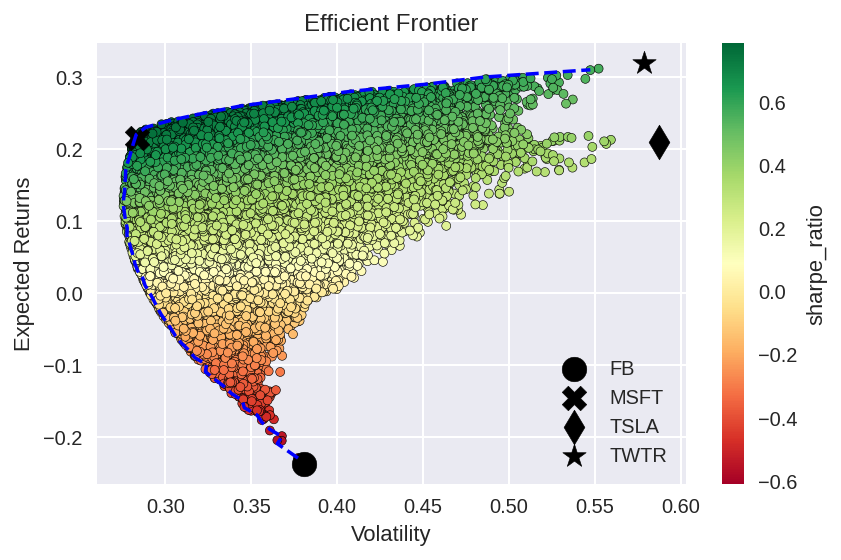

In [ ]:
# 효율적 경계선 도식화
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=RISKY_ASSETS[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

- 총알 모양의 효율적 경계선
- 시뮬레이션된 포트폴리오를 나타내는 점을 샤프 비율 값으로 채색

### 추가 사항) 
- 샤프 비율이 가장 높은 것(단위 위험당 최대 기대 수익률) 또는 최소 변동성을 갖는 것을 조사할 수 있다.
- np.argmin과 np.argmax 사용하여 배열에서 최소값/최대값 인덱스 반환


In [ ]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [ ]:
# 최대 샤프 비율 포트폴리오의 구성 요소
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
returns: 23.42% volatility: 29.77% sharpe_ratio: 78.68% 
Weights
FB: 0.01% MSFT: 75.18% TSLA: 5.80% TWTR: 19.00% 

- 대부분의 자원(~75%)을 마이크로소프트에 배분, 페이스북에는 거의 배분 ❌
- 2018년 페이스북의 연간 평균 수익률이 마이너스기 때문

In [ ]:
# 평균 수익률
avg_returns

FB     -0.237618
MSFT    0.214581
TSLA    0.210151
TWTR    0.319659
dtype: float64

In [ ]:
# 최소 변동성 포트폴리오의 구성 요소
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: 13.45% volatility: 27.56% sharpe_ratio: 48.79% 
Weights
FB: 17.80% MSFT: 78.75% TSLA: 2.94% TWTR: 0.50% 

- 마이크로소프트에 ~79% 가중치 할당 ➡ 변동성이 가장 낮기 때문

In [ ]:
# 공분산 행렬
cov_mat

,FB,MSFT,TSLA,TWTR
FB,0.144889,0.059666,0.061845,0.092148
MSFT,0.059666,0.080394,0.065049,0.077328
TSLA,0.061845,0.065049,0.344898,0.097106
TWTR,0.092148,0.077328,0.097106,0.335112


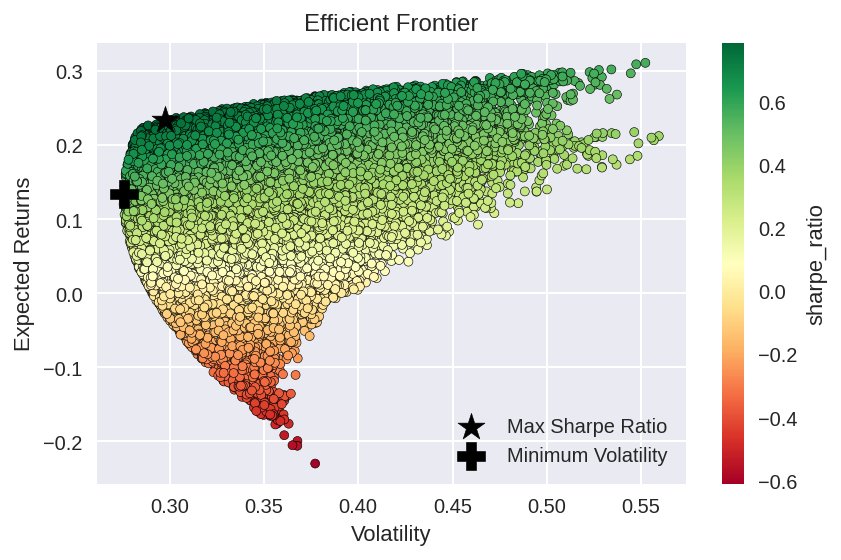

In [ ]:
# 위의 두 가지 포트폴리오를 효율적 경계선 그림에 표시
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='black', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()
plt.show()

# 3. scipy 최적화로 효율적 경계선 찾기
- **효율적 경계선**
  - 특정 변동성에 대해 가장 높은 예상 포트폴리오 수익률 제공
  - 특정 수준 예상 수익에 대해 가장 낮은 위험(변동성) 제공
  - 위의 두 사실을 활용해 수치 최적화❗
- 최적화 목표 : 목표 변수를 조정하고, 목표 변수에 영향을 주는 일부 경계와 제약 조건을 고려해 *목적 함수의 최대값 찾기*
  - 목적 함수 : 포트폴리오 변동성을 반환하는 함수
  - 목표 변수 : 포트폴리오 가중치
- Linear Programming
  - min **w<sup>T</sup>∑w**
  - s.t  **w<sup>T</sup>1 = 1** , **w >= 0**, **w<sup>T</sup>μ** = **μ<sub>p</sub>**
  - w : 가중치 벡터
  - ∑ : 공분산 행렬
  - μ<sub>p</sub> : 기대 포트폴리오 수익률
  - 최소화하려는 지표로 포트폴리오 변동성 사용❗
- 다양한 예상 포트폴리오 수익률에 대해 최적의 포트폴리오 가중치를 찾는 최적화 루틴 반복 ➡ 효율적 경계선
- 몬테카를로 시뮬레이션과 비교를 위해 동일 데이터셋 사용
  

In [ ]:
# 라이브러리 불러오기
import numpy as np
import scipy.optimize as sco

In [ ]:
# 포트폴리오 수익률과 변동성 계산 함수 정의
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [ ]:
# 효율적 경계선 계산 함수 정의
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    # 객체 정의
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))  # 경계
    initial_guess = n_assets * [1. / n_assets, ]  # 목표 변수의 초기 추측 -> 1/n 배분
    
    for ret in rtns_range:
        constraints = ({'type': 'eq', 
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                       {'type': 'eq', 
                        'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess, 
                                           args=args, method='SLSQP',   # SLSQP 알고리즘으로 최적기 실행
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

- 주어진 과거 통계와 고려된 수익 범위에 대해 효율적인 포트폴리오가 포함된 목록 반환
- SLSQP 알고리즘 : 복잡한 현실 문제를 단순화해 **목적함수를 이차식으로 근사**해 풀고 다음 번 지점을 예측해 다시 동일한 방법을 수행하는 문제를 푸는 알고리즘으로서 비선형 최적화 문제를 해결❕

In [ ]:
# 고려한 수익률 구간 정의
rtns_range = np.linspace(-0.22, 0.32, 200)

In [ ]:
# 효율적 경계 계산
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

In [ ]:
# 효율적 포트폴리오의 변동성 추출 = 최적화된 목적 함수
vols_range = [x['fun'] for x in efficient_portfolios]

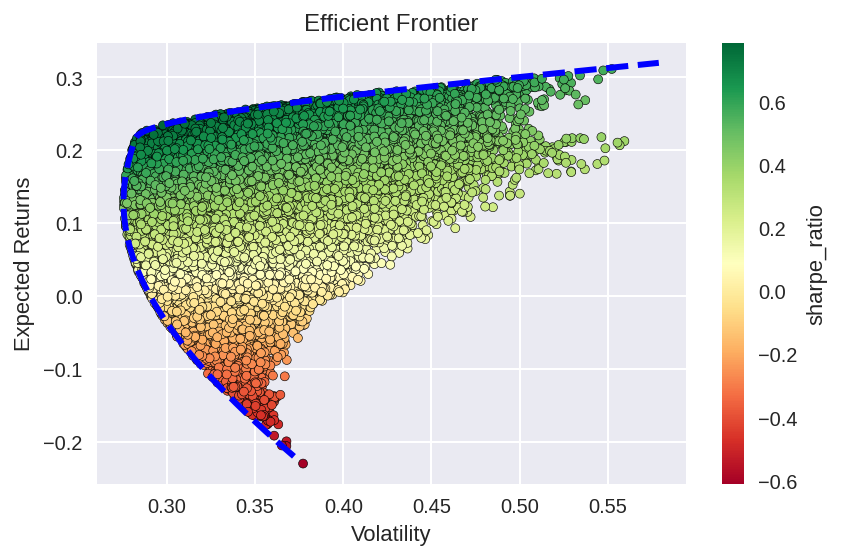

In [ ]:
# 계산된 효율적 경계선을 시뮬레이션된 포트폴리오와 함께 도식화
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')

plt.tight_layout()
plt.show()

- 몬테카를로 시뮬레이션을 사용해 얻은 것과 매우 유사한 모양 ➡ 차이점 : 선이 더 매끄럽다❗

In [ ]:
# 최소 변동 포트폴리오
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                 'Volatility': min_vol_portf_vol,
                 'Sharpe Ratio': (min_vol_portf_rtn / 
                                  min_vol_portf_vol)}

min_vol_portf

{'Return': 0.13005025125628142,
 'Sharpe Ratio': 0.4721962894435822,
 'Volatility': 0.2754156569284515}

In [ ]:
# 성능 요약 출력
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(RISKY_ASSETS, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 13.01% Volatility: 27.54% Sharpe Ratio: 47.22% 
Weights
FB: 18.65% MSFT: 77.34% TSLA: 4.01% TWTR: 0.00% 

- 트위터에 전혀 투자 ❌
- 몬테카를로와 배분 패턴 동일 ➡ 주로 마이크로소프트와 페이스북에 투자

### 추가 사항) 
- 최적화 접근법 사용해 예상 샤프 비율이 가장 높은 포트폴리오인 **탄젠시 포트폴리오**를 생성하는 가중치를 찾을 수 있다.
- 샤프 비율을 음수로 설정한 목적 함수로 정의 ➡ 최적화 알고리즘이 최소화 문제이기 떄문에 음수로 설정
- 목적 지표의 부호 변경하면 최대화 문제에 쉽게 접근 가능

In [ ]:
# 목적 함수 정의(음의 샤프 비율)
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio  # (-) 붙이기!

In [ ]:
# 최적화 포트폴리오 찾기
n_assets = len(avg_returns)
RF_RATE = 0

args = (avg_returns, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [ ]:
# 최대 샤프 비율 포트폴리오에 대한 정보 추출
max_sharpe_portf_w = max_sharpe_portf['x']
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            avg_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w, 
                                                avg_returns, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf['fun']}
max_sharpe_portf

{'Return': 0.23097200533367807,
 'Sharpe Ratio': 0.789654673412208,
 'Volatility': 0.2924974841668648}

In [ ]:
# 성능 요약 출력
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')

for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(RISKY_ASSETS, max_sharpe_portf_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 23.10% Volatility: 29.25% Sharpe Ratio: 78.97% 
Weights
FB: 0.00% MSFT: 81.50% TSLA: 2.79% TWTR: 15.72% 

- 최대 샤프 비율을 달성하려면 페이스북에 0% 투자, 주로 마이크로소프트와 트위터에 투자해야 함!

# 4. cvxpy 컨벡스 최적화로 효율적 경계선 찾기
- 평균-분산 최적 문제 ➡ **위험-회피 프레임워크**로 수정해 투자자가 위험-조정된 수익률을 최대화하도록!
- Linear Programming
  - max  **w<sup>T</sup>μ - 𝛤w<sup>T</sup>∑w**
  - s.t  **w<sup>T</sup>1 = 1** , **w >= 0**
  - 𝛤 : 위험 회피 매개 변수, 값이 높을수록 투자자는 위험을 더 회피할 수 있다.
  - 제약 조건 : 가중치의 합 = 1, 공매도 허용❌
- 이전 두 레시피와 동일 데이터 사용해 결과 비교


## convex 최적화
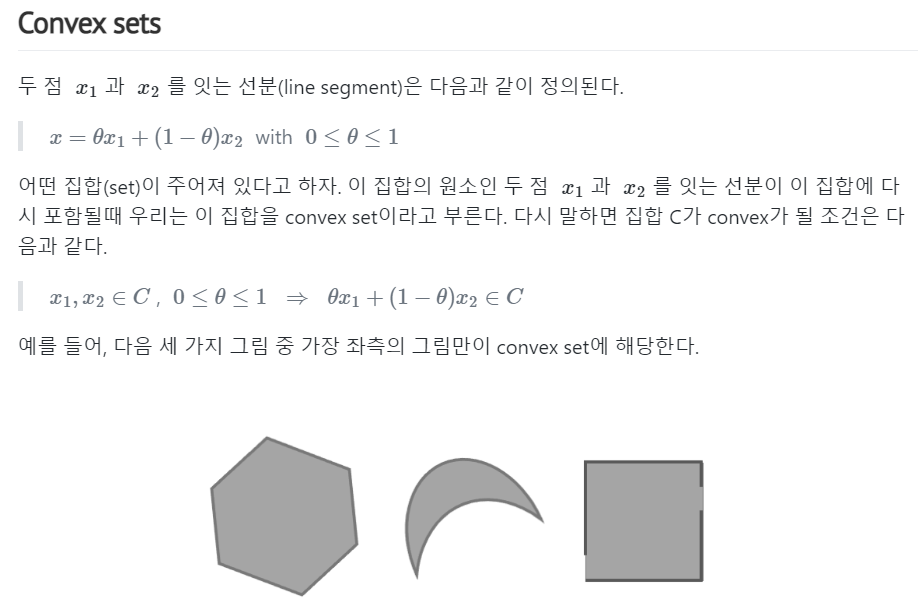
- Convexity : 집합 X에서 점과 점을 잡고 어떤 선을 그엇을 때, 그 선이 포함하는 점조차도 집합 X에 포함


- [출처](https://convex-optimization-for-all.github.io/contents/chapter01/2021/01/28/01_02_convex_optimization_problem/)
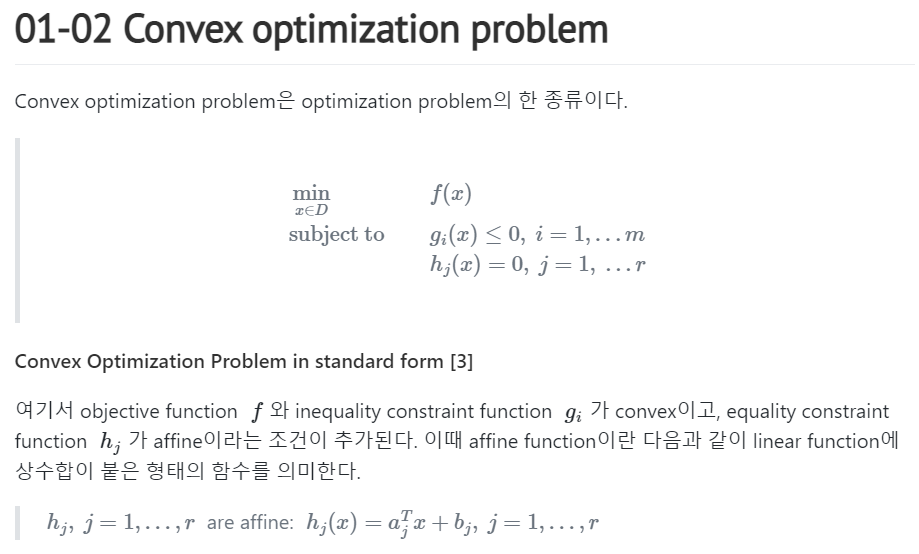
- 중요 성질 : **Convex 함수의 local minimum은 항상 global minimum이다❗** convex optimization problem의 경우 non-convex optimization problem에 비해 일반적으로 solution을 더 쉽게 구할 수 있다. 컨벡스 최적화 문제로 기술되는 기계학습 문제들을 풀기 위해 최근 많이 이용되는 알고리즘

In [ ]:
# cvxpy 컨벡스 최적화 라이브러리 불러오기
import cvxpy as cp

In [ ]:
# 연환산 평균 수익률과 공분산 행렬을 numpy 배열로 변환
avg_returns = avg_returns.values
cov_mat = cov_mat.values

In [ ]:
# 최적화 문제 설정
weights = cp.Variable(n_assets)  # 목표 변수(가중치)
gamma = cp.Parameter(nonneg=True)  # 위험 회피 매개 변수 감마
portf_rtn_cvx = avg_returns * weights   # 포트폴리오 수익률
portf_vol_cvx = cp.quad_form(weights, cov_mat)  # 포트폴리오 변동성
objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)  # 목적함수 정의 (극대화하려는 위험 조정 수익률)
problem = cp.Problem(objective_function, 
                     [cp.sum(weights) == 1, weights >= 0])  # 제약 조건

In [ ]:
# 효율적 경계선 계산
N_POINTS = 25
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value)

- 위험 회피 매개 변수 𝜞의 여러 값에 대한 컨벡스 최적화 문제를 해결해 효율적 경계선 찾기 ➡ 25개의 𝜞값
- problem.solve() 메서드 사용해 최적해 도출

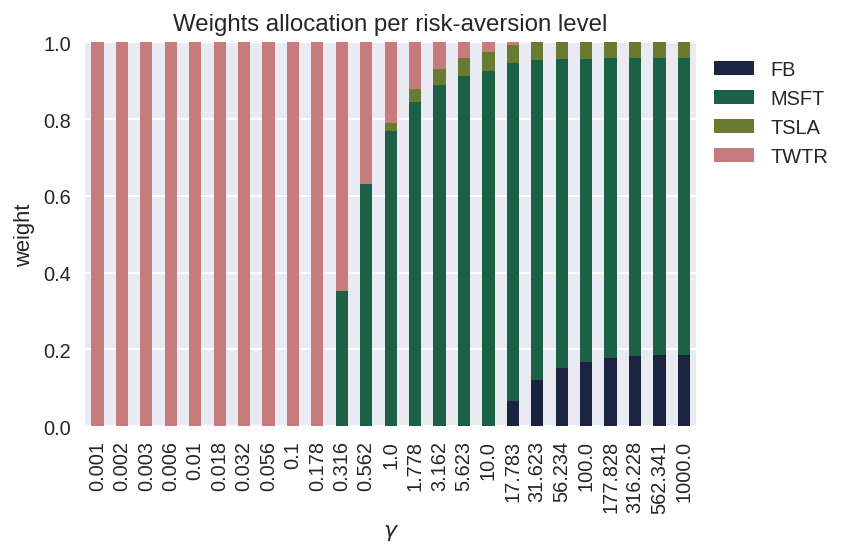

In [ ]:
# 위험-회피의 서로 다른 매개 변수에 대해 배분을 도식화
weights_df = pd.DataFrame(weights_ef, 
                          columns=RISKY_ASSETS, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True) 
ax.set(title='Weights allocation per risk-aversion level',
       xlabel=r'$\gamma$', 
       ylabel='weight')
ax.legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

- 매우 작은 𝜞값에 대해서 투자자가 자신의 자원 100%를 트위터에 배분
- 위험 회피를 증가시키면 트위터 배분🔻 마이크로소프트, 기타 자산에 배분🔺

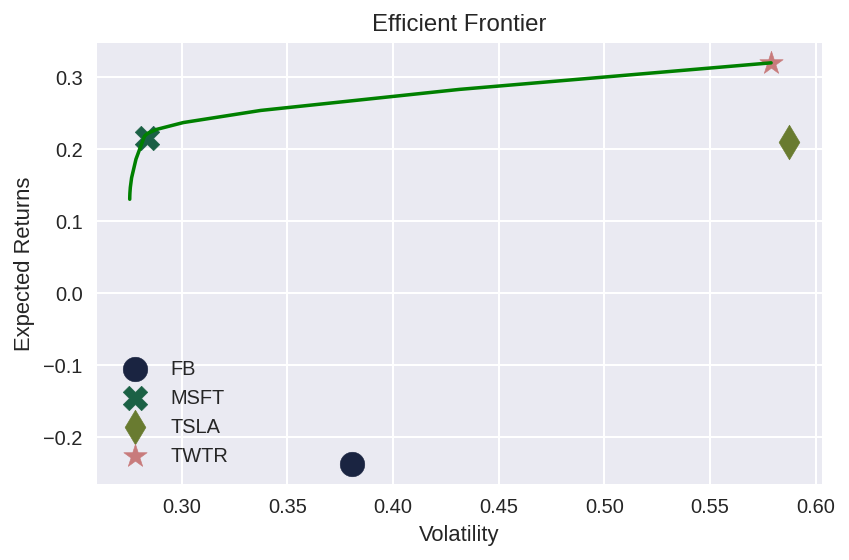

In [ ]:
# 효율적 경계선을 개별 자산과 함께 도식화
fig, ax = plt.subplots()
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'g-')
for asset_index in range(n_assets):
     plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), 
                 y=avg_returns[asset_index], 
                 marker=MARKS[asset_index], 
                 label=RISKY_ASSETS[asset_index],
                 s=150)
ax.set(title='Efficient Frontier',
       xlabel='Volatility', 
       ylabel='Expected Returns', )
ax.legend()

plt.tight_layout()
plt.show()

- 컨벡스 최적화 문제를 해결해 생성된 효율적 경계선

### 추가 사항) 
- 비교를 위해 2개의 효율적 경계선 구성 가능
  1. 예상 수익률당 **변동성을 최소화**해 계산
  2. 컨벡스 최적화를 사용, 위험 조정 **수익률을 최대화**해 계산
- 최대 허용 레버지리 이용 ➡ 벡터의 norm을 사용해 가중치에 대한 "음수가 아님" 제약 조건을 최대 레버리지 제약 조건으로 변환
- 다양한 위험 회피 수준에 따른 가중치 배분을 보여 주는 도면 재현 (최대 레버리지 = 1이면 공매도❌)

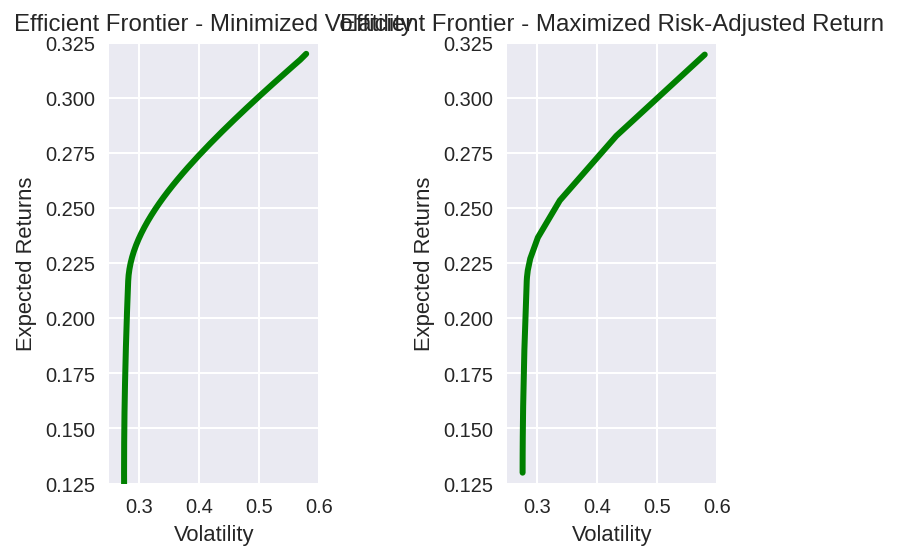

In [ ]:
# 2개의 효율적 경계선 구성

x_lim = [0.25, 0.6]
y_lim = [0.125, 0.325]

fig, ax = plt.subplots(1, 2)
ax[0].plot(vols_range, rtns_range, 'g-', linewidth=3)
ax[0].set(title='Efficient Frontier - Minimized Volatility',
          xlabel='Volatility', 
          ylabel='Expected Returns',
          xlim=x_lim, 
          ylim=y_lim)

ax[1].plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'g-', linewidth=3)
ax[1].set(title='Efficient Frontier - Maximized Risk-Adjusted Return',
          xlabel='Volatility', 
          ylabel='Expected Returns',
          xlim=x_lim, 
          ylim=y_lim)

plt.tight_layout()
plt.show()

- 왼쪽 : Minimized-Voluatility , 오른쪽 : Maximized-Risk-Adjusted Return
- 최소화 과정 사용하면 경계선 사용에 더 많은 점을 사용해 더 부드러운 line

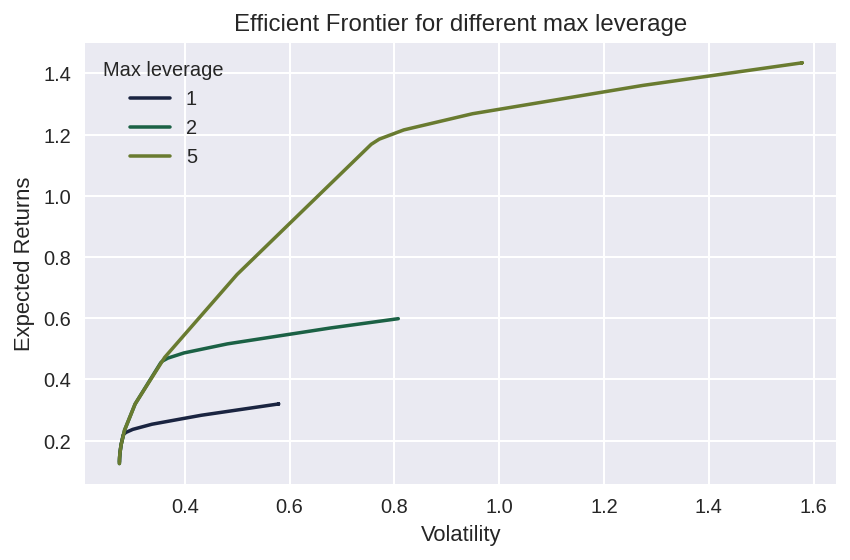

In [ ]:
# 최대 허용 레버지리 이용
max_leverage = cp.Parameter()
problem_with_leverage = cp.Problem(objective_function, 
                                   [cp.sum(weights) == 1, 
                                    cp.norm(weights, 1) <= max_leverage])

LEVERAGE_RANGE = [1, 2, 5]
len_leverage = len(LEVERAGE_RANGE)
N_POINTS = 25

portf_vol_l_ef = np.zeros((N_POINTS, len_leverage))
portf_rtn_l_ef = np.zeros(( N_POINTS, len_leverage))
weights_ef = np.zeros((len_leverage, N_POINTS, n_assets))

for lev_ind, leverage in enumerate(LEVERAGE_RANGE):
    for gamma_ind in range(N_POINTS):
        max_leverage.value = leverage
        gamma.value = gamma_range[gamma_ind]
        problem_with_leverage.solve()
        portf_vol_l_ef[gamma_ind, lev_ind] = cp.sqrt(portf_vol_cvx).value
        portf_rtn_l_ef[gamma_ind, lev_ind] = portf_rtn_cvx.value
        weights_ef[lev_ind, gamma_ind, :] = weights.value

fig, ax = plt.subplots()

for leverage_index, leverage in enumerate(LEVERAGE_RANGE):
    plt.plot(portf_vol_l_ef[:, leverage_index], 
             portf_rtn_l_ef[:, leverage_index], 
             label=f'{leverage}')

ax.set(title='Efficient Frontier for different max leverage',
       xlabel='Volatility', 
       ylabel='Expected Returns')
ax.legend(title='Max leverage')

plt.tight_layout()
plt.show()


- 최대 레버리지가 1이면 이전 최적화 문제와 비슷한 경우
- **레버리지가 높을수록 수익이 증가하고 동시에 큰 변동성을 허용❗**

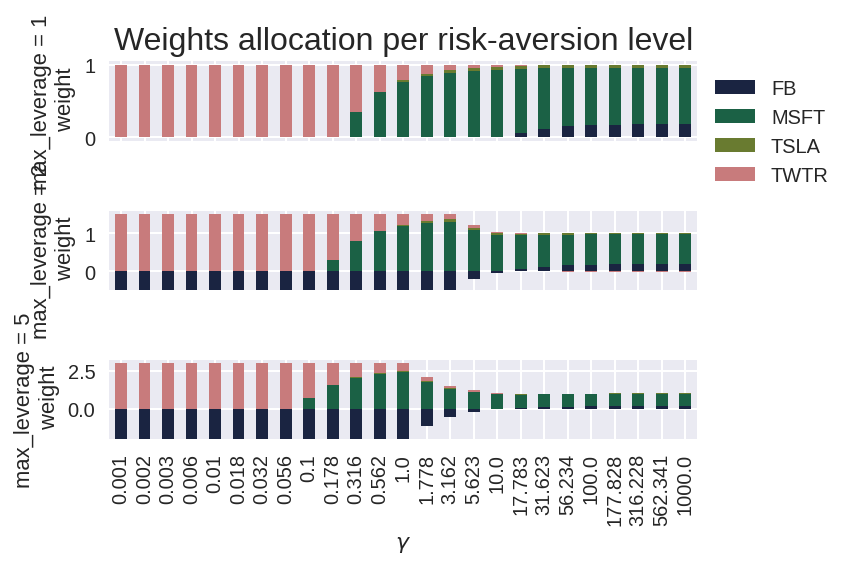

In [ ]:
# 다양한 위험 회피 수준에 따른 가중치 배분을 보여 주는 도면 재현
fig, ax = plt.subplots(len_leverage, 1, sharex=True)

for ax_index in range(len_leverage):
    weights_df = pd.DataFrame(weights_ef[ax_index], 
                              columns=RISKY_ASSETS, 
                              index=np.round(gamma_range, 3))
    weights_df.plot(kind='bar', 
                    stacked=True, 
                    ax=ax[ax_index], 
                    legend=None) 
    ax[ax_index].set(ylabel=(f'max_leverage = {LEVERAGE_RANGE[ax_index]}' 
                             '\n weight'))

    
ax[len_leverage - 1].set(xlabel=r'$\gamma$')
ax[0].legend(bbox_to_anchor=(1,1)) 
ax[0].set_title('Weights allocation per risk-aversion level',
                fontsize=16)

plt.tight_layout()
plt.show()

- 위험 회피가 증가함에 따라 투자자가 레버리지 사용을 완전히 중단
- 최대 허용 레버리지의 모든 수준에 대해 유사한 배분으로 수렴하는 패턴